In [1]:
#importa InvestmentReplica.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("InvestmentReplica.csv")
df.head()

,Date,MXWO,MXWD,LEGATRUU,HFRXGL,RX1,TY1,GC1,CO1,ES1,VG1,NQ1,LLL1,TP1,DU1,TU2
0,23/10/2007,1633.44,414.14,350.214,1343.63,113.70,110.516,759.0,82.85,1525.50,4393.0,2212.00,1287.0,1570.5,103.385,103.719
1,30/10/2007,1663.89,423.26,352.541,1356.53,113.79,110.656,787.8,87.44,1536.00,4476.0,2217.75,1323.9,1610.5,103.410,103.813
2,06/11/2007,1651.59,419.51,354.176,1360.20,113.79,110.875,823.4,93.26,1525.00,4425.0,2233.50,1320.0,1575.5,103.410,104.047
3,13/11/2007,1601.81,405.98,357.222,1347.16,114.35,111.719,799.0,88.83,1483.25,4323.0,2066.75,1271.0,1440.5,103.595,104.305
4,20/11/2007,1570.74,398.54,359.445,1335.21,114.72,113.156,791.4,95.49,1446.00,4296.0,2035.50,1225.2,1472.5,103.800,104.945


In [2]:
#transform prices to returns
def price2ret(x):
    return x.pct_change()

#transform returns to prices
def ret2price(x):
    return (1+x).cumprod()

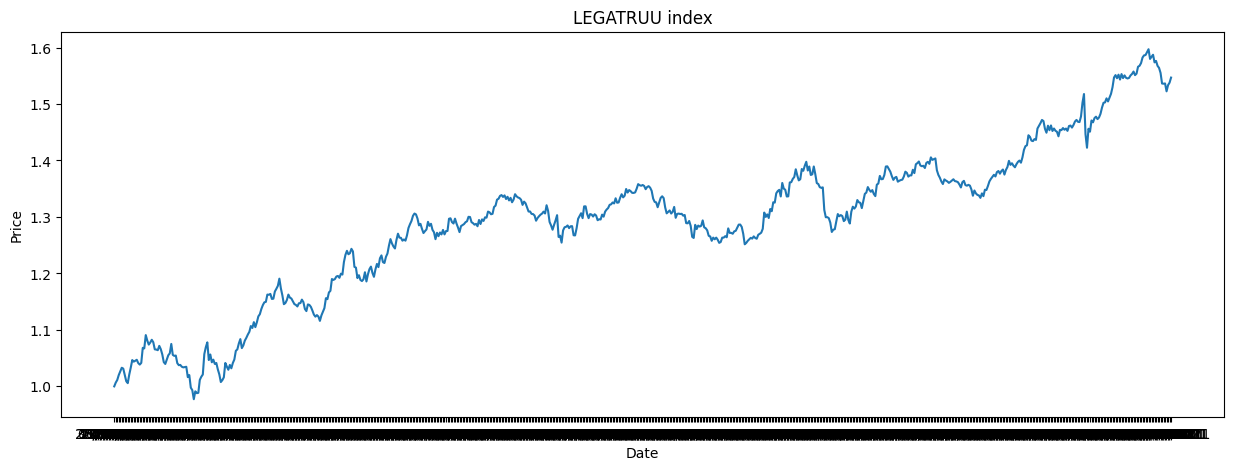

In [3]:
#plot LEGATRUU index in time, dividing it by his first value
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['LEGATRUU']/df['LEGATRUU'][0])
plt.title('LEGATRUU index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



In [4]:
wHFRXGL = 0.5
wMXWO = 0.25
wLEGATRUU = 0.25

y = wHFRXGL*price2ret(df.HFRXGL) + wMXWO*price2ret(df.MXWO) + wLEGATRUU*price2ret(df.LEGATRUU)
target = (ret2price(y))
target = target.dropna()

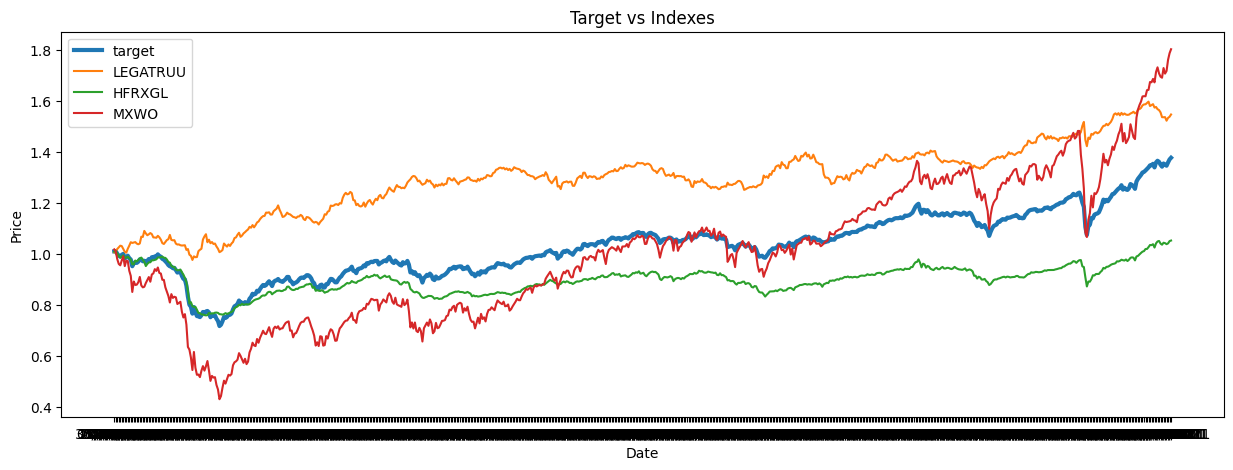

In [5]:
#plot the target in time, versus the LEGATRUU index, also versus the HFRXGL and MXWO indexes
plt.figure(figsize=(15,5))
plt.plot(df['Date'][1:], target, label='target',linewidth=3)
plt.plot(df['Date'][1:], df['LEGATRUU'][1:]/df['LEGATRUU'][0], label='LEGATRUU')
plt.plot(df['Date'][1:], df['HFRXGL'][1:]/df['HFRXGL'][0], label='HFRXGL')
plt.plot(df['Date'][1:], df['MXWO'][1:]/df['MXWO'][0], label='MXWO')
plt.title('Target vs Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
#make a dataframe X with the indexes RX1	TY1	GC1	CO1	ES1	VG1	NQ1	LLL1	TP1	DU1	TU2, in returns
X = df[['RX1','TY1','GC1','CO1','ES1','VG1','NQ1','LLL1','TP1','DU1','TU2']]
X = X.pct_change()
X = X.dropna()
X.head()

,RX1,TY1,GC1,CO1,ES1,VG1,NQ1,LLL1,TP1,DU1,TU2
1,0.000792,0.001267,0.037945,0.055401,0.006883,0.018894,0.002599,0.028671,0.025470,0.000242,0.000906
2,0.000000,0.001979,0.045189,0.066560,-0.007161,-0.011394,0.007102,-0.002946,-0.021732,0.000000,0.002254
3,0.004921,0.007612,-0.029633,-0.047502,-0.027377,-0.023051,-0.074659,-0.037121,-0.085687,0.001789,0.002480
4,0.003236,0.012863,-0.009512,0.074975,-0.025114,-0.006246,-0.015120,-0.036035,0.022215,0.001979,0.006136
5,0.003138,0.007043,0.028557,-0.031103,-0.013485,-0.012803,-0.001474,-0.023670,0.008489,0.001204,0.001496


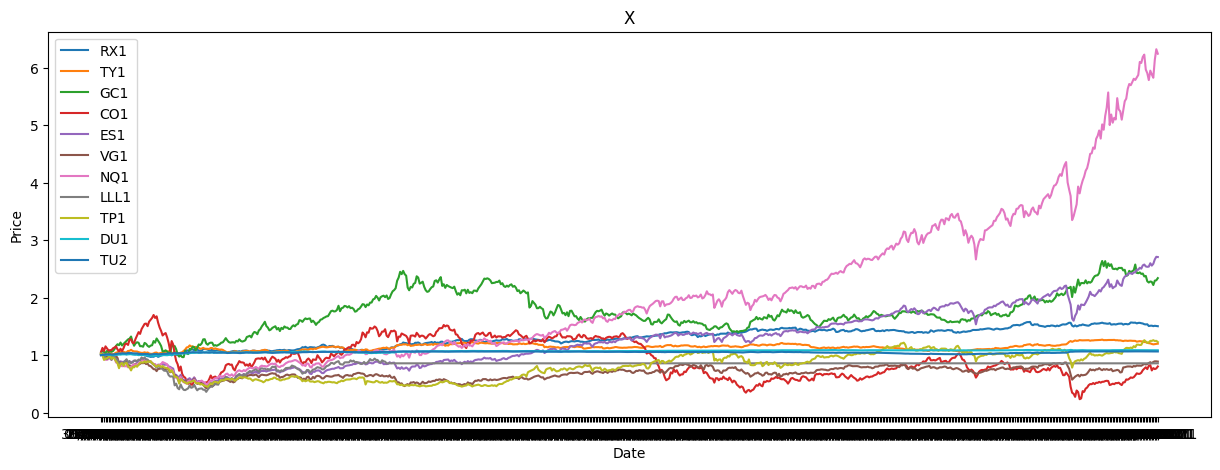

In [7]:
#plot X in time, after transforming it in prices
plt.figure(figsize=(15,5))
plt.plot(df['Date'][1:], ret2price(X.RX1), label='RX1')
plt.plot(df['Date'][1:], ret2price(X.TY1), label='TY1')
plt.plot(df['Date'][1:], ret2price(X.GC1), label='GC1')
plt.plot(df['Date'][1:], ret2price(X.CO1), label='CO1')
plt.plot(df['Date'][1:], ret2price(X.ES1), label='ES1')
plt.plot(df['Date'][1:], ret2price(X.VG1), label='VG1')
plt.plot(df['Date'][1:], ret2price(X.NQ1), label='NQ1')
plt.plot(df['Date'][1:], ret2price(X.LLL1), label='LLL1')
plt.plot(df['Date'][1:], ret2price(X.TP1), label='TP1')
plt.plot(df['Date'][1:], ret2price(X.DU1), label='DU1')
plt.plot(df['Date'][1:], ret2price(X.TU2), label='TU2')
plt.title('X')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
X=ret2price(X)

In [9]:
X

,RX1,TY1,GC1,CO1,ES1,VG1,NQ1,LLL1,TP1,DU1,TU2
1,1.000792,1.001267,1.037945,1.055401,1.006883,1.018894,1.002599,1.028671,1.025470,1.000242,1.000906
2,1.000792,1.003248,1.084848,1.125649,0.999672,1.007284,1.009720,1.025641,1.003184,1.000242,1.003162
3,1.005717,1.010885,1.052701,1.072179,0.972304,0.984066,0.934335,0.987568,0.917224,1.002031,1.005650
4,1.008971,1.023888,1.042688,1.152565,0.947886,0.977919,0.920208,0.951981,0.937599,1.004014,1.011820
5,1.012137,1.031100,1.072464,1.116717,0.935103,0.965399,0.918852,0.929448,0.945559,1.005223,1.013334
...,...,...,...,...,...,...,...,...,...,...,...
700,1.512049,1.193691,2.272859,0.733736,2.556408,0.858866,5.879860,0.857498,1.247055,1.084683,1.064251
701,1.503958,1.187050,2.218577,0.774170,2.587807,0.881402,5.821994,0.857498,1.259472,1.084200,1.064289
702,1.509938,1.191574,2.294466,0.757272,2.664045,0.892329,6.134720,0.857498,1.244826,1.084490,1.063267
703,1.506245,1.195103,2.300659,0.768497,2.709145,0.891646,6.318151,0.857498,1.248965,1.084442,1.063383


In [10]:
target

1      1.011122
2      1.011793
3      1.001495
4      0.993755
5      0.990176
         ...   
700    1.349709
701    1.346174
702    1.359037
703    1.370842
704    1.377308
Length: 704, dtype: float64

In [11]:
# #perform a lasso regression on X, with target y
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, shuffle=False)

# lasso = Lasso(alpha=0.0001, max_iter=100000)
# lasso.fit(X_train, y_train)
# y_pred = lasso.predict(X_test)

# #plot the prediction versus the target
# plt.figure(figsize=(15,5))
# plt.plot(df['Date'][len(X_train)+1:], y_pred, label='prediction')
# plt.plot(df['Date'][len(X_train)+1:], y_test, label='target')
# plt.title('Prediction vs Target')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [12]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#do again lasso, but with a rolling window approach of 150 days
y_pred = []
y_test = []
for i in range(150, len(X)):
    lasso = Lasso(alpha=0.0001, max_iter=100000, fit_intercept=False)
    lasso.fit(X[i-150:i], target[i-150:i])
    y_pred.append(lasso.predict(X[i:i+1]))
    y_test.append(target[i:i+1])



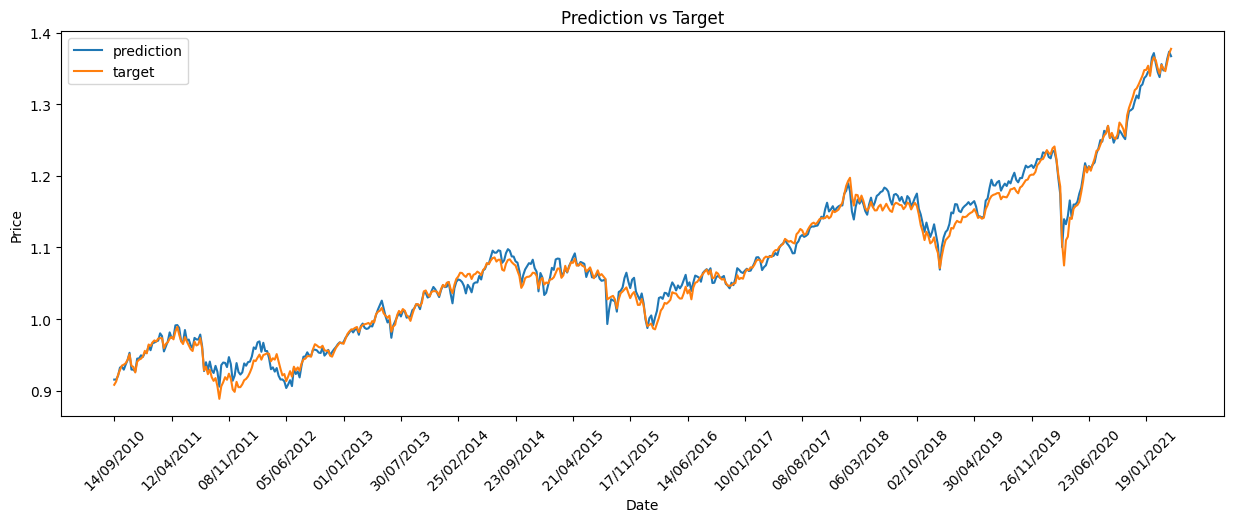

0.00011862807142226642

In [13]:
#plot the prediction versus the target
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_pred, label='prediction')
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_test, label='target')
plt.title('Prediction vs Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()

#compute the MSE
mean_squared_error(y_test, y_pred)



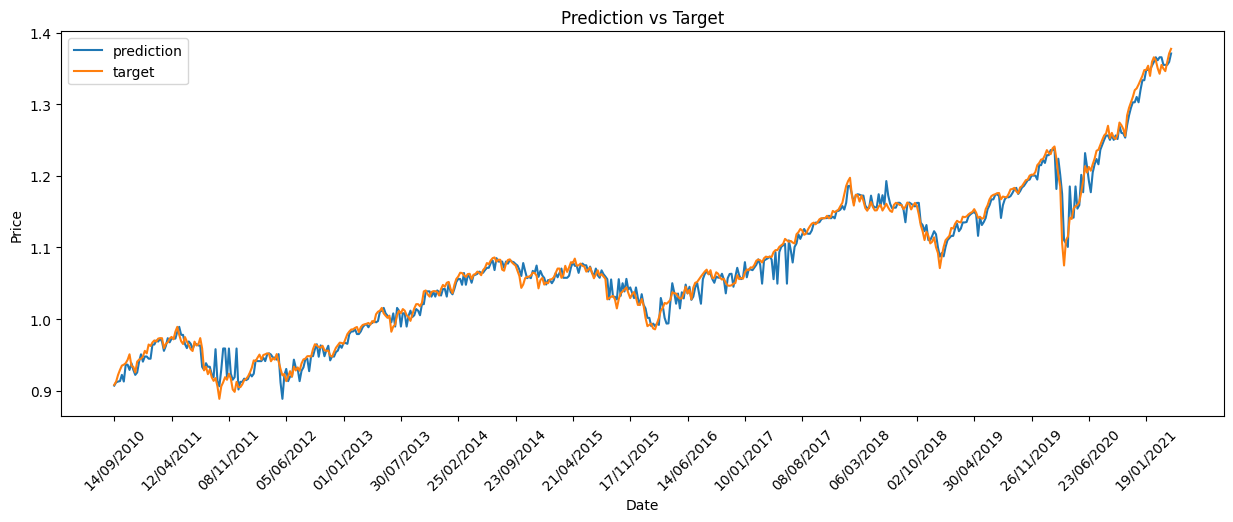

0.00014054820449961906

In [14]:
#do the regression but with a regression tree
from sklearn.tree import DecisionTreeRegressor

y_pred = []
y_test = []
for i in range(150, len(X)):
    tree = DecisionTreeRegressor()
    tree.fit(X[i-150:i], target[i-150:i])
    y_pred.append(tree.predict(X[i:i+1]))
    y_test.append(target[i:i+1])


#plot the prediction versus the target
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_pred, label='prediction')
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_test, label='target')
plt.title('Prediction vs Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()

#compute the MSE
mean_squared_error(y_test, y_pred)




PROVE

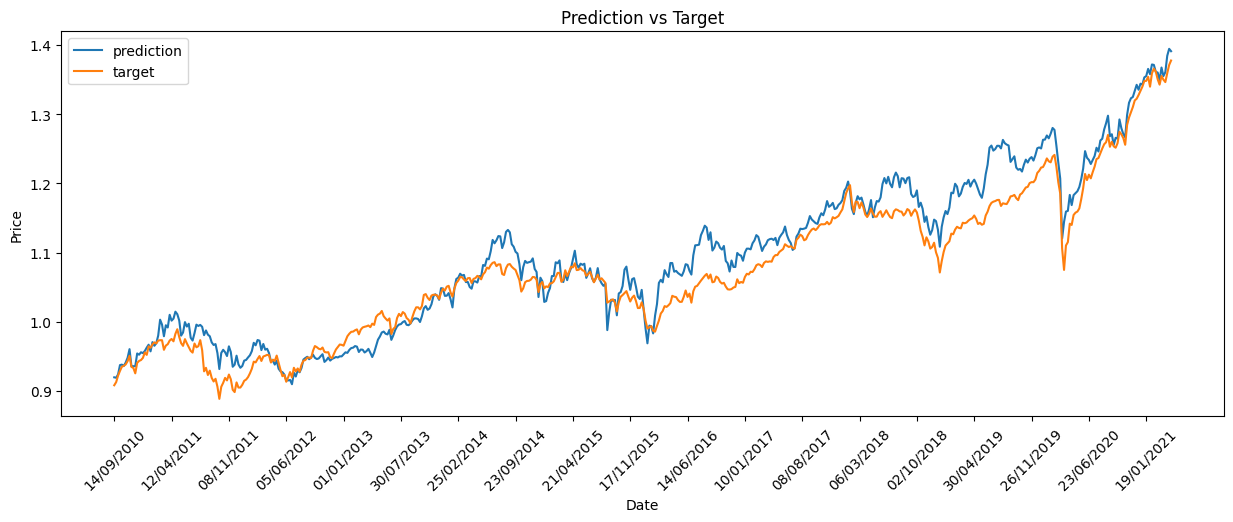

0.0009598518102420964

In [15]:
#re do the lasso regression with rolling window, but cross validating the model, and saving the weights of the features
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_pred = []
y_test = []
weights = []
gross_exposure = []

for i in range(150, len(X)):
    lasso = LassoCV(cv=5, max_iter=100000,fit_intercept=False)
    lasso.fit(X[i-150:i], target[i-150:i])
    y_pred.append(lasso.predict(X[i:i+1]))
    y_test.append(target[i:i+1])
    weights.append(lasso.coef_)
    gross_exposure.append(np.sum(np.abs(lasso.coef_)))


#plot the prediction versus the target
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_pred, label='prediction')
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_test, label='target')
plt.title('Prediction vs Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()

#compute the MSE

mean_squared_error(y_test, y_pred)



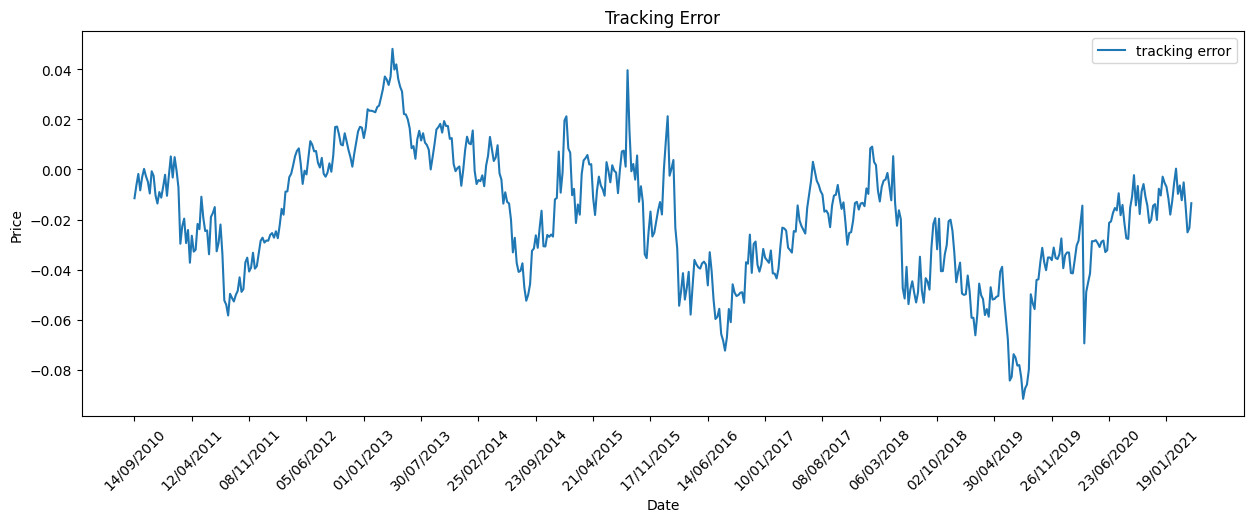

In [16]:
#calculate the Tracking Error = Excess Return = difference between target performance and replica performance.


#compute the tracking error
tracking_error = []
for i in range(len(y_pred)):
    tracking_error.append(y_test[i] - y_pred[i])

#plot the tracking error
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], tracking_error, label='tracking error')
plt.title('Tracking Error')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()



In [17]:
#calculate the Tracking Error Volatility = (annualized) standard deviation of Tracking Error.
#compute the tracking error volatility
tracking_error_volatility = np.std(tracking_error)*np.sqrt(52)

tracking_error_volatility



0.17644657049817083

In [18]:
#calculate the Information Ratio = Excess Return / Tracking Error Volatility.
#compute the information ratio
information_ratio = np.mean(tracking_error)/tracking_error_volatility

information_ratio
    

-0.10770111589976747

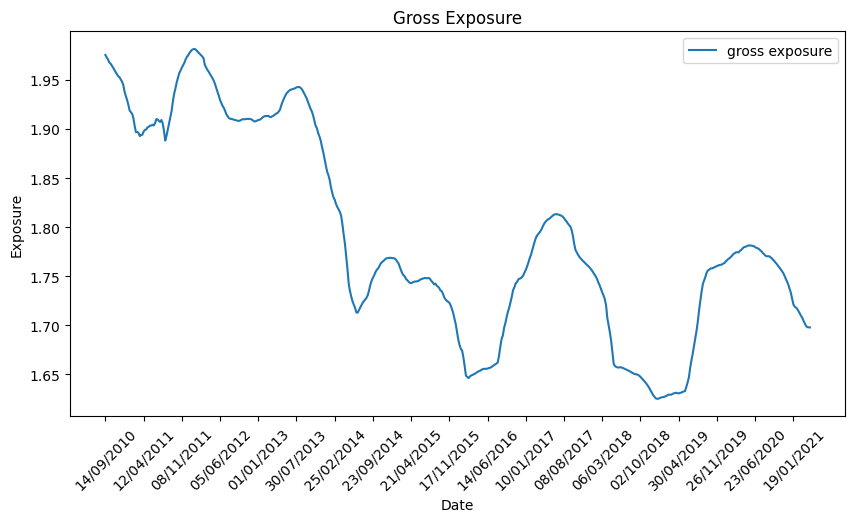

In [21]:
#plot the gross exposure
plt.figure(figsize=(10,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], gross_exposure+np.ones(np.shape(gross_exposure)), label='gross exposure')
plt.title('Gross Exposure')
plt.xlabel('Date')
plt.ylabel('Exposure')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


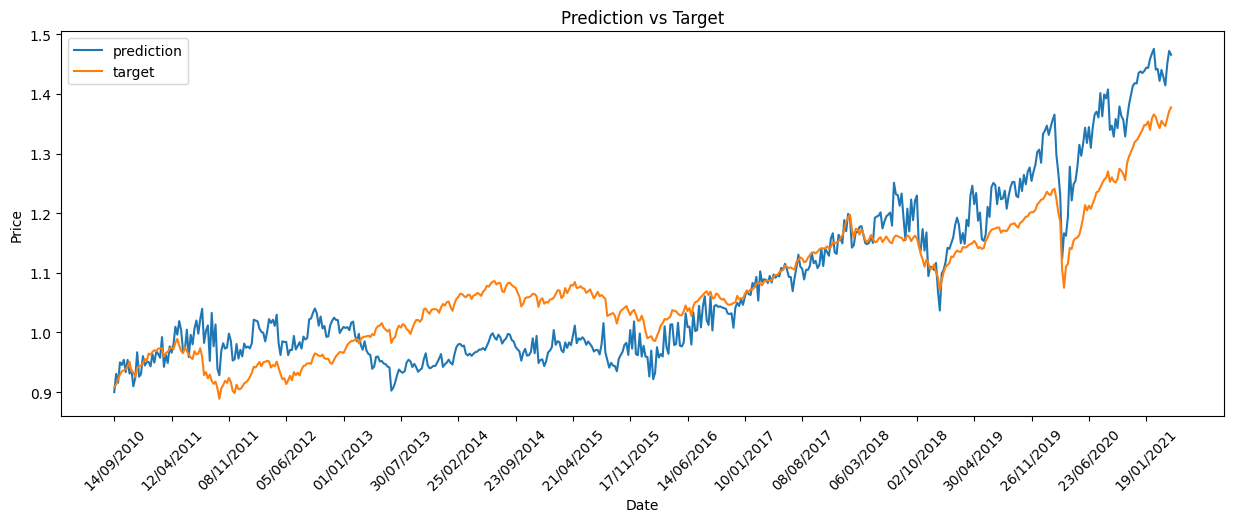

MSE:  0.004233892142454168


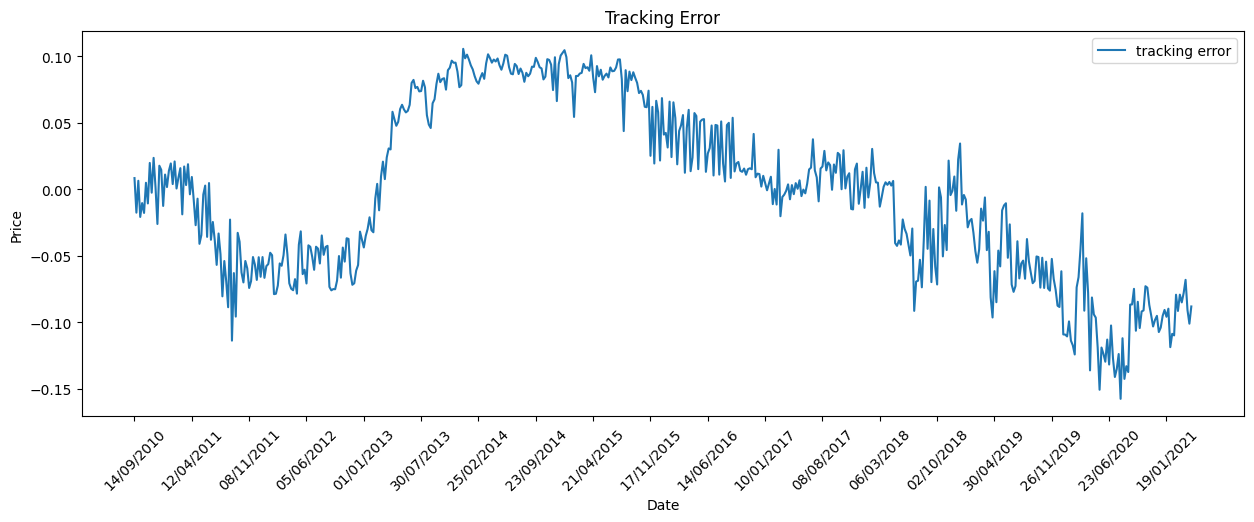

Tracking Error Volatility:  0.4686824775772774
Information Ratio:  -0.006610357953910899


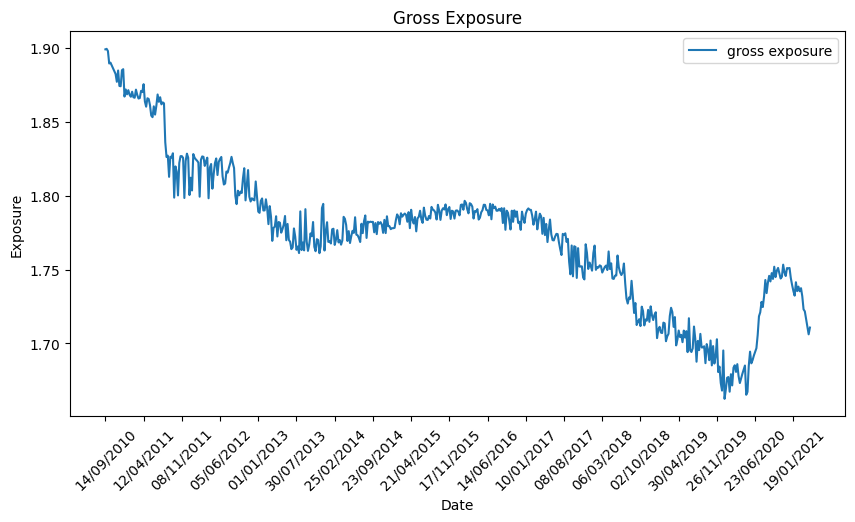

In [22]:
#do the regression on the rolling window, saving weights, saving gross exposure, using cross validation, using different models
from sklearn.linear_model import PassiveAggressiveRegressor

y_pred = []
y_test = []
weights = []
gross_exposure = []

for i in range(150, len(X)):
    model = PassiveAggressiveRegressor(fit_intercept=False)
    model.fit(X[i-150:i], target[i-150:i])
    y_pred.append(model.predict(X[i:i+1]))
    y_test.append(target[i:i+1])
    weights.append(model.coef_)
    gross_exposure.append(np.sum(np.abs(model.coef_)))


#plot the prediction versus the target
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_pred, label='prediction')
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_test, label='target')
plt.title('Prediction vs Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()

#compute the MSE
print('MSE: ', mean_squared_error(y_test, y_pred))

#calculate the Tracking Error = Excess Return = difference between target performance and replica performance.
#compute the tracking error
tracking_error = []
for i in range(len(y_pred)):
    tracking_error.append(y_test[i] - y_pred[i])

#plot the tracking error
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], tracking_error, label='tracking error')
plt.title('Tracking Error')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


#calculate the Tracking Error Volatility = (annualized) standard deviation of Tracking Error.
#compute the tracking error volatility
tracking_error_volatility = np.std(tracking_error)*np.sqrt(52)

print('Tracking Error Volatility: ', tracking_error_volatility)



#calculate the Information Ratio = Excess Return / Tracking Error Volatility.
#compute the information ratio
information_ratio = np.mean(tracking_error)/tracking_error_volatility

print('Information Ratio: ', information_ratio)

#plot the gross exposure
plt.figure(figsize=(10,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], gross_exposure+np.ones(np.shape(gross_exposure)), label='gross exposure')
plt.title('Gross Exposure')
plt.xlabel('Date')
plt.ylabel('Exposure')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


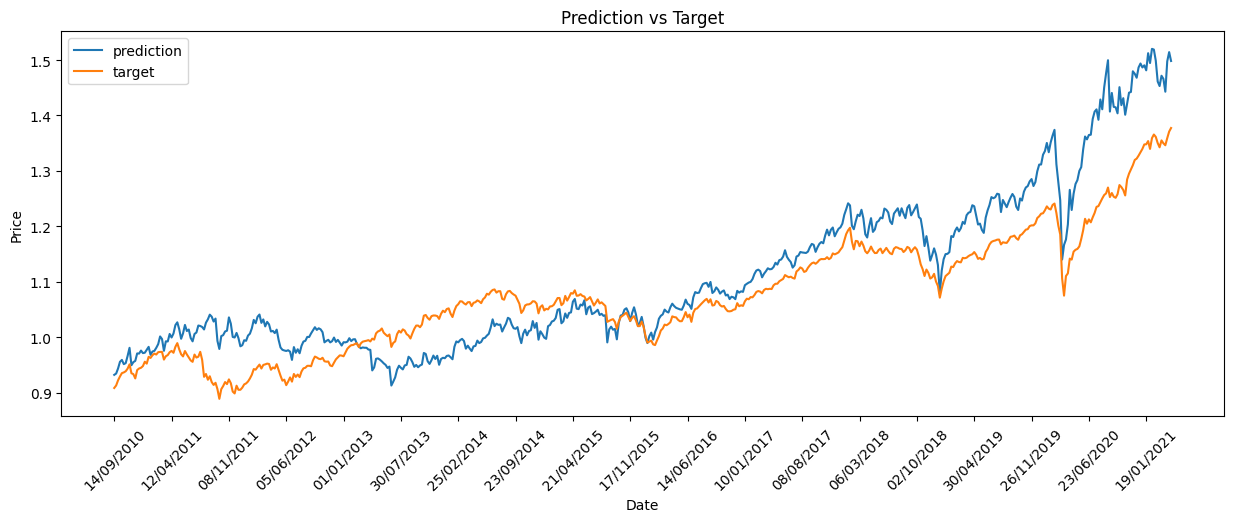

MSE:  0.004911787960787151


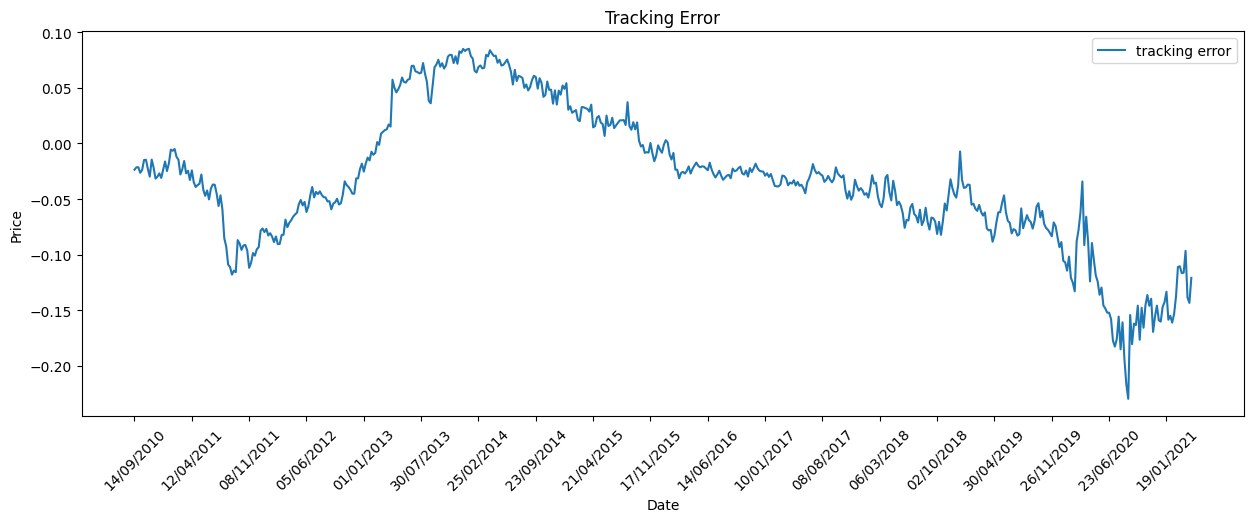

Tracking Error Volatility:  0.4445124751700305
Information Ratio:  -0.07501697578936001


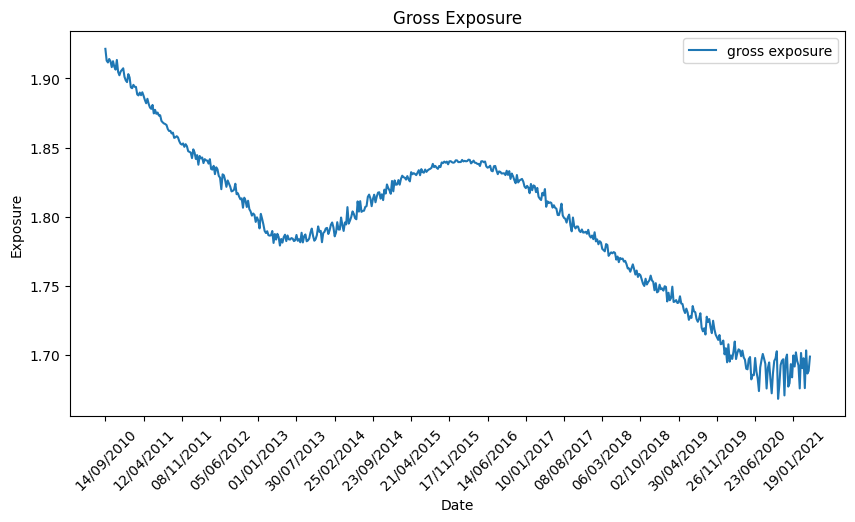

In [23]:
#now use sgd regressor saving weights, saving gross exposure, using cross validation
from sklearn.linear_model import SGDRegressor

y_pred = []
y_test = []
weights = []
gross_exposure = []

for i in range(150, len(X)):
    model = SGDRegressor(average=True, fit_intercept=False)
    model.fit(X[i-150:i], target[i-150:i])
    y_pred.append(model.predict(X[i:i+1]))
    y_test.append(target[i:i+1])
    weights.append(model.coef_)
    gross_exposure.append(np.sum(np.abs(model.coef_)))


#plot the prediction versus the target
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_pred, label='prediction')
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_test, label='target')
plt.title('Prediction vs Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()

#compute the MSE
print('MSE: ', mean_squared_error(y_test, y_pred))

#calculate the Tracking Error = Excess Return = difference between target performance and replica performance.
#compute the tracking error

tracking_error = []
for i in range(len(y_pred)):
    tracking_error.append(y_test[i] - y_pred[i])

#plot the tracking error
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], tracking_error, label='tracking error')
plt.title('Tracking Error')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


#calculate the Tracking Error Volatility = (annualized) standard deviation of Tracking Error.
#compute the tracking error volatility
tracking_error_volatility = np.std(tracking_error)*np.sqrt(52)

print('Tracking Error Volatility: ', tracking_error_volatility)



#calculate the Information Ratio = Excess Return / Tracking Error Volatility.
#compute the information ratio
information_ratio = np.mean(tracking_error)/tracking_error_volatility

print('Information Ratio: ', information_ratio)

#plot the gross exposure
plt.figure(figsize=(10,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], gross_exposure+np.ones(np.shape(gross_exposure)), label='gross exposure')
plt.title('Gross Exposure')
plt.xlabel('Date')
plt.ylabel('Exposure')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


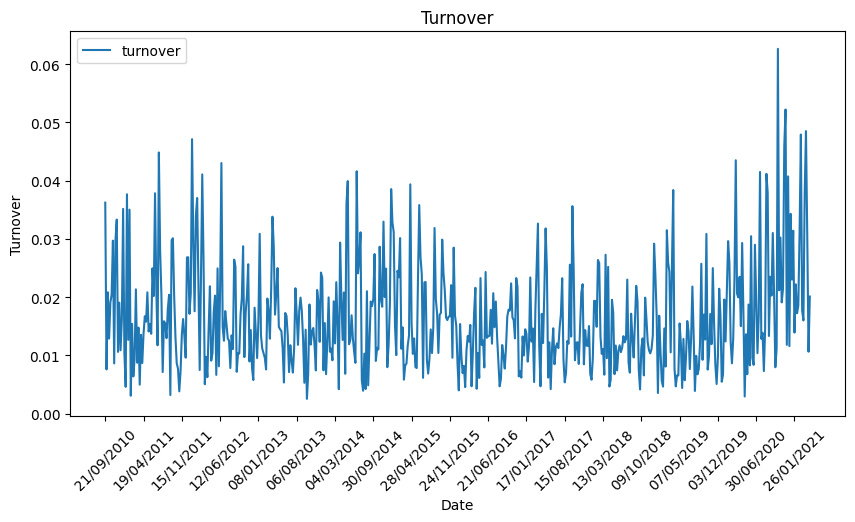

Average Turnover:  0.8576346278442597


In [25]:
#calculate the turnover
turnover = []
for i in range(len(weights)-1):
    turnover.append(np.sum(np.abs(weights[i+1]-weights[i])))

#plot the turnover
plt.figure(figsize=(10,5))
plt.plot(df['Date'][len(X)-len(y_pred)+2:], turnover, label='turnover')
plt.title('Turnover')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+2::30], rotation=45)
plt.show()

#calculate the average annual turnover
average_turnover = np.mean(turnover)*52

print('Average Turnover: ', average_turnover)



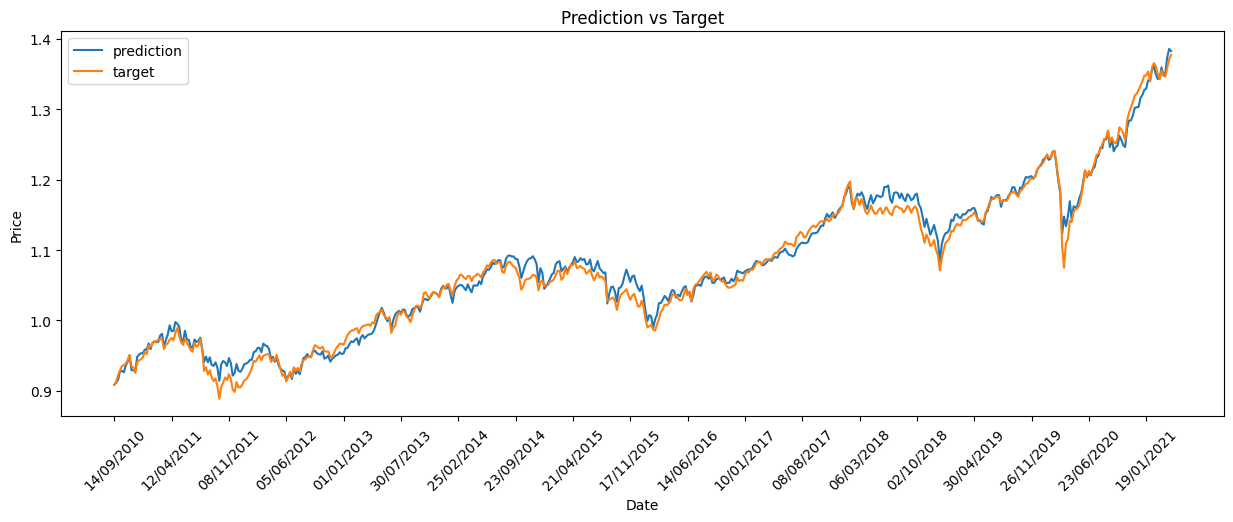

MSE:  0.00015759216686832002


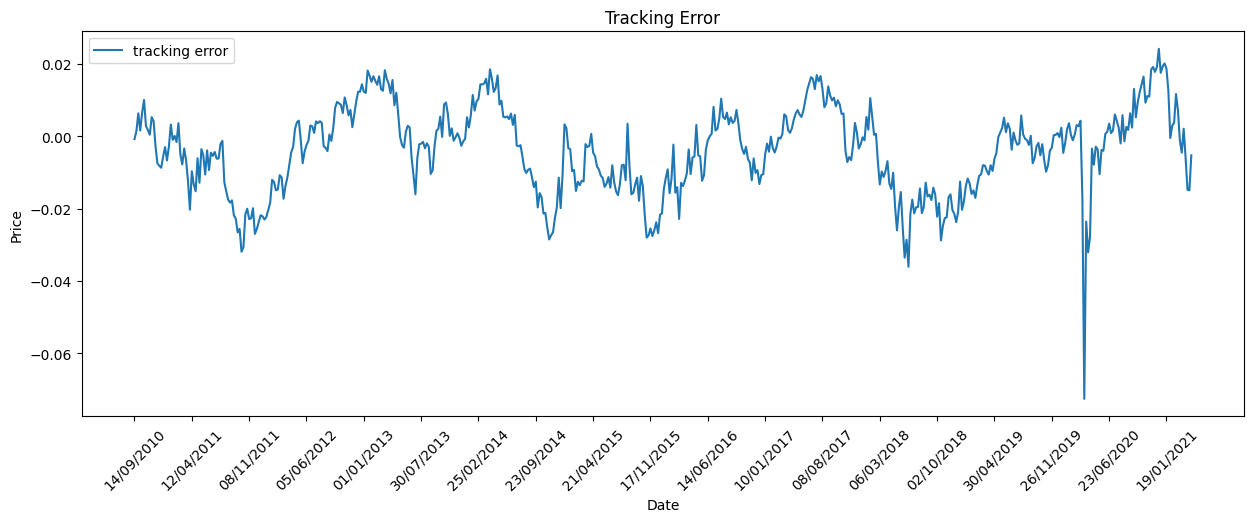

Tracking Error Volatility:  0.08573374078881284
Information Ratio:  -0.047005762764543234


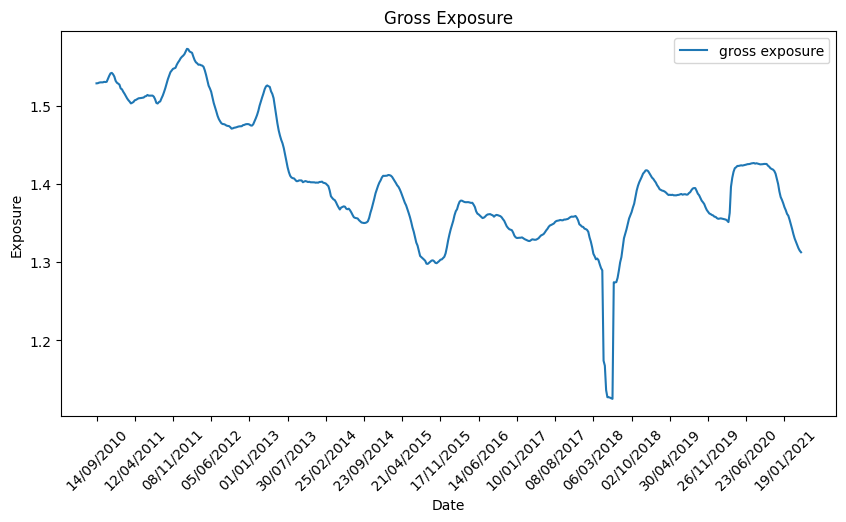

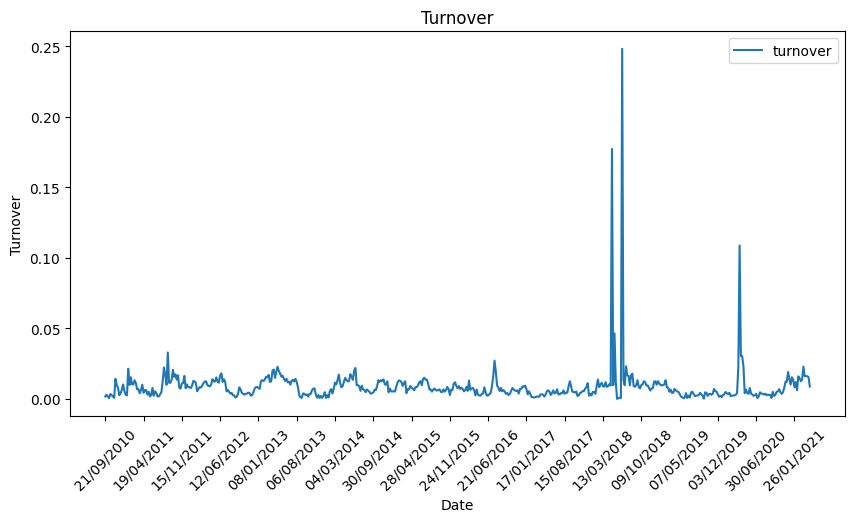

Average Turnover:  0.45952406823311553


In [27]:
#now use elastic net saving weights, saving gross exposure, using cross validation and grid search
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

y_pred = []
y_test = []
weights = []
gross_exposure = []

for i in range(150, len(X)):
    model = ElasticNet()
    parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
    grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X[i-150:i], target[i-150:i])
    y_pred.append(grid_search.predict(X[i:i+1]))
    y_test.append(target[i:i+1])
    weights.append(grid_search.best_estimator_.coef_)
    gross_exposure.append(np.sum(np.abs(grid_search.best_estimator_.coef_)))


#plot the prediction versus the target
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_pred, label='prediction')
plt.plot(df['Date'][len(X)-len(y_pred)+1:], y_test, label='target')
plt.title('Prediction vs Target')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()

#compute the MSE
print('MSE: ', mean_squared_error(y_test, y_pred))

#calculate the Tracking Error = Excess Return = difference between target performance and replica performance.
#compute the tracking error

tracking_error = []
for i in range(len(y_pred)):
    tracking_error.append(y_test[i] - y_pred[i])

#plot the tracking error
plt.figure(figsize=(15,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], tracking_error, label='tracking error')
plt.title('Tracking Error')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


#calculate the Tracking Error Volatility = (annualized) standard deviation of Tracking Error.
#compute the tracking error volatility
tracking_error_volatility = np.std(tracking_error)*np.sqrt(52)

print('Tracking Error Volatility: ', tracking_error_volatility)



#calculate the Information Ratio = Excess Return / Tracking Error Volatility.
#compute the information ratio
information_ratio = np.mean(tracking_error)/tracking_error_volatility

print('Information Ratio: ', information_ratio)

#plot the gross exposure
plt.figure(figsize=(10,5))
plt.plot(df['Date'][len(X)-len(y_pred)+1:], gross_exposure+np.ones(np.shape(gross_exposure)), label='gross exposure')
plt.title('Gross Exposure')
plt.xlabel('Date')
plt.ylabel('Exposure')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+1::30], rotation=45)
plt.show()


#calculate the turnover

turnover = []
for i in range(len(weights)-1):
    turnover.append(np.sum(np.abs(weights[i+1]-weights[i])))

#plot the turnover
plt.figure(figsize=(10,5))
plt.plot(df['Date'][len(X)-len(y_pred)+2:], turnover, label='turnover')
plt.title('Turnover')
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.legend()
plt.xticks(df['Date'][len(X)-len(y_pred)+2::30], rotation=45)
plt.show()

#calculate the average annual turnover
average_turnover = np.mean(turnover)*52

print('Average Turnover: ', average_turnover)
